# Afonichev Demid SSE2019

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime

In [2]:
ts_conf = pd.read_csv('data/covid_confirmed.csv')
ts_conf.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,484,521,555,607,665,714,784,840,906,933
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,409,416,433,446,467,475,494,518,539,548
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,583,601,601,638,646,659,673,673,696,704
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,24


In [3]:
df_conf = ts_conf.set_index(['Province/State', 'Country/Region', 'Lat', 'Long']) \
       .stack() \
       .reset_index(name='value') \
       .rename(columns={'level_4':'date'})
df_conf.head()

,Province/State,Country/Region,Lat,Long,date,value
0,NaN,Afghanistan,33.0,65.0,1/22/20,0
1,NaN,Afghanistan,33.0,65.0,1/23/20,0
2,NaN,Afghanistan,33.0,65.0,1/24/20,0
3,NaN,Afghanistan,33.0,65.0,1/25/20,0
4,NaN,Afghanistan,33.0,65.0,1/26/20,0


## Task 1. Compute statistics of total number of cases on the 10’th day since 50 confirmed cases:
-  Mean
-  Median
-  Max
-  Min

If " March, 13" is the first day with >= 50 confirmed cases, then "March, 22" is the day you need.

In [4]:
conf_50p = df_conf[df_conf['value'] >= 50]
conf_50p.head()

,Province/State,Country/Region,Lat,Long,date,value
62,NaN,Afghanistan,33.0,65.0,3/24/20,74
63,NaN,Afghanistan,33.0,65.0,3/25/20,84
64,NaN,Afghanistan,33.0,65.0,3/26/20,94
65,NaN,Afghanistan,33.0,65.0,3/27/20,110
66,NaN,Afghanistan,33.0,65.0,3/28/20,110


In [5]:
conf_day_10 = conf_50p.groupby(['Country/Region']).nth(10).reset_index()
conf_day_10.head()

,Country/Region,Province/State,Lat,Long,date,value
0,Afghanistan,NaN,33.0000,65.0000,4/3/20,281
1,Albania,NaN,41.1533,20.1683,3/26/20,174
2,Algeria,NaN,28.0339,1.6596,3/26/20,367
3,Andorra,NaN,42.5063,1.5218,3/29/20,334
4,Argentina,NaN,-38.4161,-63.6167,3/26/20,502


In [6]:
print(f'mean   = {conf_day_10.value.mean():.2f}')
print(f'median = {conf_day_10.value.median():.2f}')
print(f'max    = {conf_day_10.value.max():.2f}')
print(f'min    = {conf_day_10.value.mean():.2f}')

mean   = 513.91
median = 277.50
max    = 7402.00
min    = 513.91


## Task 2. Compute statistics of total number of deaths on last available day:
- Mean 
- Median 
- Max 
- Min

In [7]:
ts_death = pd.read_csv('data/covid_deaths.csv')
ts_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,15,15,18,18,21,23,25,30,30,30
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,23,23,23,23,23,24,25,26,26,26
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,235,256,275,293,313,326,336,348,364,367
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,25,26,26,29,29,31,33,33,35,35
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [8]:
df_death = ts_death.set_index(['Province/State', 'Country/Region', 'Lat', 'Long']) \
       .stack() \
       .reset_index(name='value') \
       .rename(columns={'level_4':'date'})
df_death.head()

,Province/State,Country/Region,Lat,Long,date,value
0,NaN,Afghanistan,33.0,65.0,1/22/20,0
1,NaN,Afghanistan,33.0,65.0,1/23/20,0
2,NaN,Afghanistan,33.0,65.0,1/24/20,0
3,NaN,Afghanistan,33.0,65.0,1/25/20,0
4,NaN,Afghanistan,33.0,65.0,1/26/20,0


In [9]:
death_last_day = df_death.groupby(['Country/Region']).last().reset_index()
death_last_day.head()

,Country/Region,Province/State,Lat,Long,date,value
0,Afghanistan,NaN,33.0000,65.0000,4/18/20,30
1,Albania,NaN,41.1533,20.1683,4/18/20,26
2,Algeria,NaN,28.0339,1.6596,4/18/20,367
3,Andorra,NaN,42.5063,1.5218,4/18/20,35
4,Angola,NaN,-11.2027,17.8739,4/18/20,2


In [10]:
print(f'mean   = {death_last_day.value.mean():.2f}')
print(f'median = {death_last_day.value.median():.2f}')
print(f'max    = {death_last_day.value.max():.2f}')
print(f'min    = {death_last_day.value.mean():.2f}')

mean   = 621.40
median = 8.00
max    = 38664.00
min    = 621.40


## Task 3. What was the average number of new cases for the last 10 days in Germany?

In [11]:
conf_last_10days = conf_50p.groupby(['Country/Region']).tail(10).reset_index()
conf_last_10days.head()

,index,Province/State,Country/Region,Lat,Long,date,value
0,78,NaN,Afghanistan,33.0,65.0,4/9/20,484
1,79,NaN,Afghanistan,33.0,65.0,4/10/20,521
2,80,NaN,Afghanistan,33.0,65.0,4/11/20,555
3,81,NaN,Afghanistan,33.0,65.0,4/12/20,607
4,82,NaN,Afghanistan,33.0,65.0,4/13/20,665


In [12]:
conf_last_10days[conf_last_10days['Country/Region'] == 'Germany'].value.mean() 

131173.5

## Task 4. Compute case fatality rate (death to total cases ratio) for the last available day in countries with more than 10 000 reported cases (in total). 
- What is the biggest case fatality rate? Write percentage rounded to 2 decimal places.
- What is the lowest? Write percentage rounded to 2 decimal places.
- Plot a scatter plot: Total number of cases vs Case fatality rate, color points according to the country.

In [13]:
conf_last_day = df_conf.groupby(['Country/Region']).last().reset_index()
conf_last_day.head()

,Country/Region,Province/State,Lat,Long,date,value
0,Afghanistan,NaN,33.0000,65.0000,4/18/20,933
1,Albania,NaN,41.1533,20.1683,4/18/20,548
2,Algeria,NaN,28.0339,1.6596,4/18/20,2534
3,Andorra,NaN,42.5063,1.5218,4/18/20,704
4,Angola,NaN,-11.2027,17.8739,4/18/20,24


In [14]:
conf_to_death = conf_last_day.merge(death_last_day, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'date'],
                                    suffixes=('_conf', '_death'))
conf_to_death.head()

,Country/Region,Province/State,Lat,Long,date,value_conf,value_death
0,Afghanistan,NaN,33.0000,65.0000,4/18/20,933,30
1,Albania,NaN,41.1533,20.1683,4/18/20,548,26
2,Algeria,NaN,28.0339,1.6596,4/18/20,2534,367
3,Andorra,NaN,42.5063,1.5218,4/18/20,704,35
4,Angola,NaN,-11.2027,17.8739,4/18/20,24,2


In [15]:
conf_to_death = conf_to_death[conf_to_death['value_conf'] >= 10000]
conf_to_death.head()

,Country/Region,Province/State,Lat,Long,date,value_conf,value_death
9,Austria,NaN,47.5162,14.5501,4/18/20,14671,443
16,Belgium,NaN,50.8333,4.0000,4/18/20,37183,5453
23,Brazil,NaN,-14.2350,-51.9253,4/18/20,36658,2354
65,Germany,NaN,51.0000,9.0000,4/18/20,143342,4459
78,India,NaN,21.0000,78.0000,4/18/20,15722,521


In [16]:
conf_to_death['fatality_rate'] = conf_to_death.value_death / conf_to_death.value_conf
conf_to_death.head()

,Country/Region,Province/State,Lat,Long,date,value_conf,value_death,fatality_rate
9,Austria,NaN,47.5162,14.5501,4/18/20,14671,443,0.030196
16,Belgium,NaN,50.8333,4.0000,4/18/20,37183,5453,0.146653
23,Brazil,NaN,-14.2350,-51.9253,4/18/20,36658,2354,0.064215
65,Germany,NaN,51.0000,9.0000,4/18/20,143342,4459,0.031107
78,India,NaN,21.0000,78.0000,4/18/20,15722,521,0.033138


In [17]:
print(f'max = {conf_to_death.fatality_rate.max() * 100:.2f}%')
print(f'min = {conf_to_death.fatality_rate.min() * 100:.2f}%')

max = 14.67%
min = 0.85%


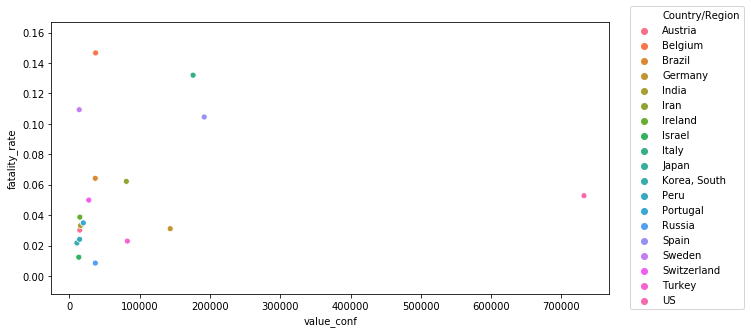

In [18]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='value_conf', y='fatality_rate', hue='Country/Region', data=conf_to_death) \
   .legend(loc='center right', bbox_to_anchor=(1.25, 0.5))

## Task 5. On which weekday most cases were reported in France on average? On which weekday least cases were reported in Italy on average?

In [19]:
def get_weekday(date):
    return datetime.datetime.strptime(date, '%m/%d/%y').strftime('%A')

In [20]:
df_conf['day'] = df_conf.apply(lambda row: get_weekday(row.date), axis=1)
df_conf.head()

,Province/State,Country/Region,Lat,Long,date,value,day
0,NaN,Afghanistan,33.0,65.0,1/22/20,0,Wednesday
1,NaN,Afghanistan,33.0,65.0,1/23/20,0,Thursday
2,NaN,Afghanistan,33.0,65.0,1/24/20,0,Friday
3,NaN,Afghanistan,33.0,65.0,1/25/20,0,Saturday
4,NaN,Afghanistan,33.0,65.0,1/26/20,0,Sunday


In [21]:
country_weekday = df_conf.groupby(by=['Country/Region', 'day']).mean().reset_index()
country_weekday.head()

,Country/Region,day,Lat,Long,value
0,Afghanistan,Friday,33.0,65.0,142.384615
1,Afghanistan,Monday,33.0,65.0,105.750000
2,Afghanistan,Saturday,33.0,65.0,148.769231
3,Afghanistan,Sunday,33.0,65.0,94.750000
4,Afghanistan,Thursday,33.0,65.0,132.461538


In [22]:
france_weekday = country_weekday[country_weekday['Country/Region'] == 'France']
france_weekday[france_weekday['value'] == max(france_weekday['value'])]

,Country/Region,day,Lat,Long,value
429,France,Saturday,8.305673,5.429018,2599.153846


In [23]:
italy_weekday = country_weekday[country_weekday['Country/Region'] == 'Italy']
italy_weekday[italy_weekday['value'] == min(italy_weekday['value'])]

,Country/Region,day,Lat,Long,value
591,Italy,Sunday,43.0,12.0,39676.416667
